In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('D:/FCI/graduation project/smart city/Machine Learning/Road_crack_Detection_Model_2000.h5')

In [3]:
import glob

In [4]:
lst_noncrack_img = glob.glob('D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images/*')

In [5]:
print('Number of images noncracks : {}'.format(len(lst_noncrack_img)))

Number of images noncracks : 7


In [6]:
lst_noncrack_img

['D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\1.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\2.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\3.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\4.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\non fire image 1.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\non_crack 1.png',
 'D:/FCI/graduation project/smart city/Machine Learning/road crack dataset/non crack images\\non_crack 2.png']

In [7]:
import random

In [8]:
lst_noncrack = []
for x in lst_noncrack_img:
    lst_noncrack.append([x,0])

random.shuffle(lst_noncrack)

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(lst_noncrack,columns = ['files','target'])
df

,files,target
0,D:/FCI/graduation project/smart city/Machine L...,0
1,D:/FCI/graduation project/smart city/Machine L...,0
2,D:/FCI/graduation project/smart city/Machine L...,0
3,D:/FCI/graduation project/smart city/Machine L...,0
4,D:/FCI/graduation project/smart city/Machine L...,0
5,D:/FCI/graduation project/smart city/Machine L...,0
6,D:/FCI/graduation project/smart city/Machine L...,0


In [11]:
import cv2

In [12]:
def preprocessing_image(filepath):
    img = cv2.imread(filepath) #read
    if img is None:
        print("Error: Could not load image")
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
    img = cv2.resize(img,(227,227))  # resize
    img = img / 255 #scale
    return img

In [13]:
import numpy as np

In [14]:
def create_format_dataset(dataframe):
    X = []
    y = []
    i=0
    for f,t in dataframe.values:
        i+=1
        print(i)
        X.append(preprocessing_image(f))
        y.append(t)

    return np.array(X),np.array(y)

In [15]:
X, y = create_format_dataset(df)

1
2
3
4
5
6
7


In [16]:
y

array([0, 0, 0, 0, 0, 0, 0])

In [17]:
print(X.shape)
print(y.shape)

(7, 227, 227, 3)
(7,)


In [18]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 332ms/step


In [19]:
y_pred = y_pred > 0.5

In [20]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False]])

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

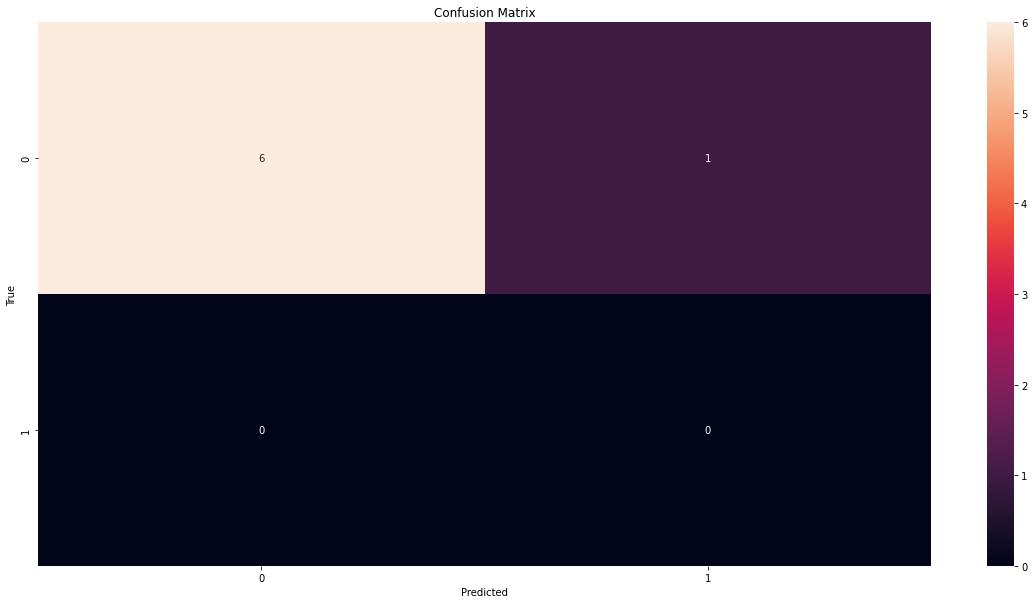

In [22]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [23]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.50      0.43      0.46         7
weighted avg       1.00      0.86      0.92         7



D:\python 3.10.6\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python 3.10.6\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python 3.10.6\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
